In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Подсчет расходов
Учтем следующие расходы:
- Покупка новых станций - 1500 долларов за станцию
- Покупка велосипеда - 1200 за велосипед (= цене штрафа за утерю)
- Цена ремонта посчитанная за все время в [distance_per_bike.ipynb](https://github.com/kapibarr/big-data-project/blob/main/distance_per_bike.ipynb)
- Зарплата сотрудникам 
- Затраты на бензин для развозвки велосипедов
- Аренда территории под станции 
- Бензин для развозки велосипедов

In [23]:
amount_of_stations = {
    2013: 300,
    2014: 300,
    2015: 474,
    2016: 1697,
    2017: 1167,
    2018: 615,
    2019: 652,
    2020: 695,
    2021: 845,
    2022: 1693,
}  # Посчитанно в файле stations_statistic.ipynb
amount_of_bikes = {
    2013: 2887,
    2014: 2968,
    2015: 4724,
    2016: 5748,
    2017: 6243,
    2018: 6243,
    2019: 6259,
}  # Посчитано через количество уникальных bike_id в датасетах где они есть

# Посчитаем средний коэффициент роста количества велосипедов (усредненное отношение количества в году x и x-1) и рассчитаем по нему количество велосипедов для 2020-2022
result = (
    lambda dct: sum(
        dct[key] / dct[list(dct.keys())[i - 1]]
        for i, key in enumerate(list(dct.keys()))
        if i > 0
    )
    / 6
)
coef = result(amount_of_bikes)
# Получим значения за оставшиеся года по коэффициенту
for year in range(2019, 2023):
    # Получение значения за предыдущий год
    prev_value = amount_of_bikes[year]
    # Домножение значения на коэффициент
    new_value = prev_value * coef
    # Сохранение нового значения в словарь для текущего года
    amount_of_bikes[year + 1] = round(new_value)

previous_amount = 0
people_working = 4
sale_year = 800
full_tech_cost = 802636  # Посчитанно в отдельном файле distance_per_bike.ipynb
average_tech_cost = (
    full_tech_cost + 222 * 1200
) / 11  # Получим средние траты на ремонт и потерянные велосипеды (посчитанные в файле bicycle_losses.ipynb)

In [24]:
cost = []
app = 3500 # Учет стоимость мобильного приложения 1 раз, а после обнулим ее

# Посчитаем расходы по годам
for year in range(2013, 2023):
    stations_change = (
        amount_of_stations[year] - previous_amount
    )  # Сколько станций поменялось
    if stations_change >= 0:
        stations_cost = stations_change * 1500  # Стоимость установки новой станции
    else:
        stations_cost = (
            stations_change * 100
        )  # Если изменение отрицательное, то станции сносили, считаем что снос станции ~= 100 долларам
    loan_cost = (
        amount_of_bikes[year] * 25 * 12
    )  # Считая что на один велосипед нужен м^2, а средняя стоимость аренды одного м^2 25 долларов в месяц
    marketing_cost = (
        sale_year * 12
    )  # Считая что средняя стоимость аренды рекламного щита - 800 долларов в месяц
    office_cost = (
        800 * 12
    )  # Считая что средняя стоимость аренды офиса - 800 долларов в месяц
    salary_cost = (
        people_working * 4200 * 12
    )  # Считая что средняя зарплата - 4200 долларов в месяц
    fuel_cost = (
        8.8 * 1.040 * 365
    )  # Считая что для развозки каждый день нужно проехать 110 километров, а средний расход бензина - литр на 8 км
    cost.append(
        (
            year,
            stations_cost
            + loan_cost
            + marketing_cost
            + app
            + office_cost
            + salary_cost
            + fuel_cost
            + average_tech_cost,
        )
    )

    people_working = (
        people_working * 1.5
    )  # Считая что количество работников увеличивается в 1.5 раза
    sale_year = (
        sale_year * 0.9
    ) # Считая что затраты на рекламу уменьшаются в 0.9 раза
    app = 0
    previous_amount = amount_of_stations[year]

In [25]:
cost

[(2013, 1640925.5709090908),
 (2014, 1311565.5709090908),
 (2015, 2249701.570909091),
 (2016, 4356423.970909092),
 (2017, 2956924.130909091),
 (2018, 3464394.2749090907),
 (2019, 4344777.404509091),
 (2020, 5790942.221149092),
 (2021, 8007445.556125091),
 (2022, 12023226.057603491)]

In [26]:
income = {
    2013: 1147646.396,
    2014: 1810310.4610000001,
    2015: 2713855.0480000004,
    2016: 2516202.8550000004,
    2017: 2439806.944,
    2018: 876209.794,
    2019: 1187995.3880000005,
    2020: 30362274.562,
    2021: 72789122.105,
    2022: 84571609.882,
}  # Посчитанно в full_price_calculation.ipynb

In [27]:
years = [x[0] for x in income.items()]
income_list = [x[1] for x in income.items()]
cost_list = [x[1] for x in cost]

Text(0, 0.5, 'Значение (в миллионах)')

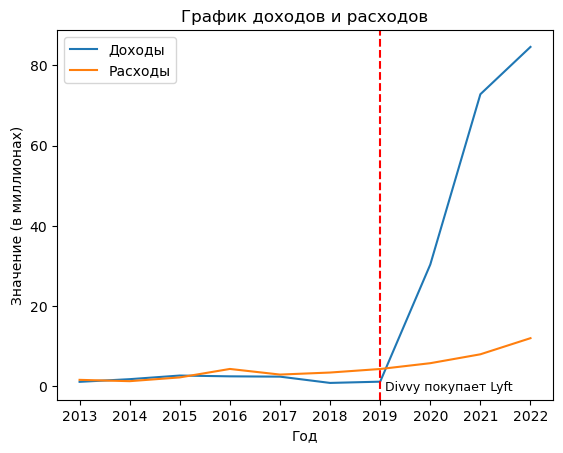

In [28]:
plt.plot(years, [x / 1000000 for x in income_list], label="Доходы")

plt.plot([x[0] for x in cost], [x[1] / 1000000 for x in cost], label="Расходы")
plt.xticks(years)
plt.legend(loc="upper left")
plt.title("График доходов и расходов")
plt.axvline(x=2019, color="r", linestyle="--")
plt.text(2019.1, -1, "Divvy покупает Lyft", fontsize=9)
plt.xlabel("Год")
plt.ylabel("Значение (в миллионах)")

In [29]:
cumulative_income = []  # список для накопленных доходов
cumulative_expenses = []  # список для накопленных расходов

# вычисляем накопленные доходы и расходы
for i in range(len(income_list)):
    if i == 0:
        cumulative_income.append(income_list[i])
        cumulative_expenses.append(cost_list[i])
    else:
        cumulative_income.append(cumulative_income[i - 1] + income_list[i])
        cumulative_expenses.append(cumulative_expenses[i - 1] + cost_list[i])

In [30]:
# Переводим значения в миллионы
cumulative_income = [x / 1000000 for x in cumulative_income]

cumulative_expenses = [x / 1000000 for x in cumulative_expenses]

Text(0, 0.5, 'Значение (в миллионах)')

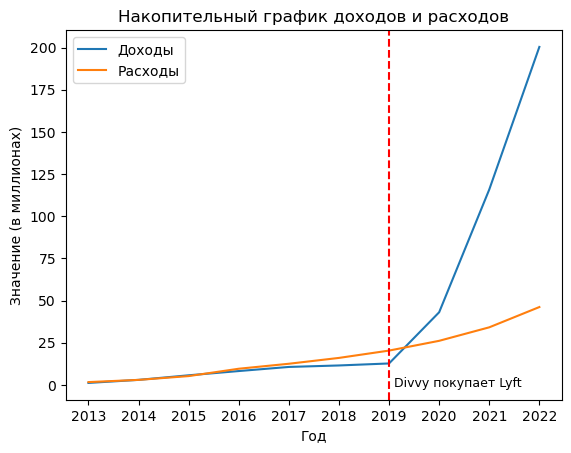

In [31]:
# строим накопительный график
plt.plot(years, cumulative_income, label="Доходы")
plt.plot(years, cumulative_expenses, label="Расходы")
plt.xticks(years)
# добавляем легенду и заголовок
plt.legend(loc="upper left")
plt.title("Накопительный график доходов и расходов")
plt.axvline(x=2019, color="r", linestyle="--")
plt.text(2019.1, -1, "Divvy покупает Lyft", fontsize=9)
plt.xlabel("Год")
plt.ylabel("Значение (в миллионах)")

Text(0.5, 1.0, 'Накопительный график доходов и расходов')

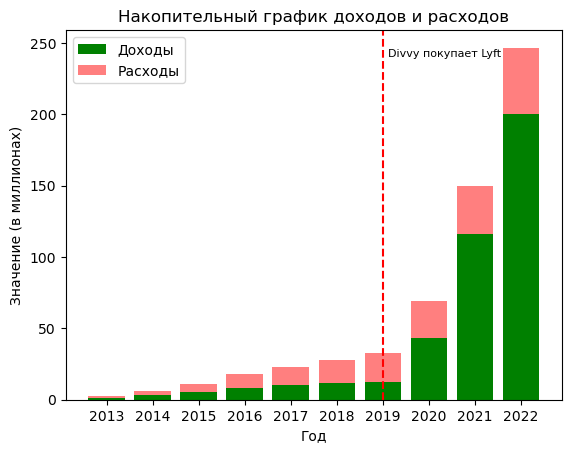

In [32]:
# Строим накопительный график
plt.bar(years, cumulative_income, label="Доходы", color="g")
plt.bar(
    years,
    cumulative_expenses,
    label="Расходы",
    color="r",
    alpha=0.5,
    bottom=cumulative_income,
)
plt.xlabel("Год")
plt.ylabel("Значение (в миллионах)")
plt.xticks(years)
plt.axvline(x=2019, color="r", linestyle="--")
plt.text(2019.1, 240, "Divvy покупает Lyft", fontsize=8)
# Добавляем легенду и заголовок
plt.legend(loc="upper left")
plt.title("Накопительный график доходов и расходов")